![head.png](figures/head.jpg)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

In [37]:
# Packages used in this notebook
import requests
from bs4 import BeautifulSoup
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
import sklearn
import time
import numpy as np
import pandas as pd

# Update package stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data sourcing

## Web scraping

[Web scraping](https://en.wikipedia.org/wiki/Web_scraping) refers to the extraction of data from websites. It's a useful technique for building datasets, especially in situations where data isn't easily accessible via APIs or other direct methods. Before we begin, it's important to mention the ethical and legal considerations associated with web scraping. Always respect the rules of the site you're scraping, including the website's robots.txt file and terms of service.

Python provides several libraries to facilitate web scraping, such as [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/), [Scrapy](https://scrapy.org/), and [Requests](https://requests.readthedocs.io/en/latest/). In this class, we'll focus on using BeautifulSoup and Requests.

First, we need to send an HTTP request to the URL of the webpage you want to access. The server responds to the request by returning the HTML content of the webpage. For this task, we'll be using the requests library. The `requests.get()` function sends a GET request to the specified url. If the request is successful, the status code will be 200. You can check the status code by `response.status_code`.

Once we have accessed the HTML content, we are left with the task of parsing the data. Since most of the HTML data is nested, we cannot extract data simply through string processing. One needs a parser which can create a nested/tree structure of the HTML data. Let's try this out using news articles from [https://news.yahoo.com/tagged/climate-change/](https://news.yahoo.com/tagged/climate-change/):

In [27]:
# URL of the webpage we want to scrape data from
url = "https://news.yahoo.com/"
# Sends a GET request to the URL to retrieve its content
response = requests.get(url)
assert response.status_code == 200
print(response.text)
# Parse results
soup = BeautifulSoup(response.text, 'html.parser')

<!DOCTYPE html><html id="atomic" class="NoJs featurephone" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><meta name="msapplication-TileColor" content="#6e329d"/><meta name="msapplication-TileImage" content="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_w_bestfit_frontpage.png"/><meta name="msvalidate.01" content="A9862C0E6E1BE95BCE0BF3D0298FD58B"/><meta name="referrer" content="unsafe-url"/><meta name="theme-color" content="#400090"/><meta name="twitter:dnt" content="on"/><meta name="twitter:site" content="@YahooNews"/><meta name="application-name" content="Yahoo News - Latest News &amp; Headlines"/><meta name="twitter:card" content="summary"/><meta name="apple-itunes-app" content="app-id=304158842"/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="twitter:description" content="The latest news and headlines from Yahoo! News. Get 

Please note that some, more complex and dynamic, websites might require a more flexible query tools, such as [Selenium](https://selenium-python.readthedocs.io/). Selenium is an open-source framework commonly used for automating web browsers.

Now that we have created the soup, we can extract information. If you want to get a specific element of a page you can use the `soup.find_all` method, which returns all the instances of a tag on a page. Finding the right id can be tedious, a web browser that allows you to 'inspect' the page can be very helpful here.

In [28]:
# Find all the articles
articles = soup.find_all('p', class_='Fz(14px) Lh(19px) Fz(13px)--sm1024 Lh(17px)--sm1024 LineClamp(2,38px) LineClamp(2,34px)--sm1024 M(0)')
# Loop over each article in 'articles', extracts the text and appends it to 'raw_text
raw_text = ''
for article in articles:
    raw_text += article.text
print(raw_text)

Authorities in northern Mexico said Sunday they have destroyed 14 homemade armored cars of the kind used by drug cartels to fight land battles. The vehicles are usually adapted from commercial trucks, with steel plate armor welded on. Known in Mexico as “monstruos,” or “Monsters,” some of the vehicles junked were truly monstrous.A woman on TikTok named Cassidy Elise took to the platform in early 2023 to share the story of being fired from her first teaching job for an unbelievable reason. In the video captioned “Welcome to 'how I got fired as an elementary school teacher,'” she started by giving viewers a little bit of history. In 2019, Elise finished school and went “straight into teaching.A 12-year professional career earned the star player $108 million in salary — but it only took two years after his playing days ended for Walker to lose everything. On the “I Am Athlete” podcast, Walker revealed how trying to keep up with the luxe lifestyle romanticized in hip-hop culture by rappers

## Textual analysis (a very brief intro)

Textual analysis in financial economics involves using statistical, linguistic, and machine learning techniques to analyze text data such as financial reports, news articles, social media posts, and other written material to extract useful information for economic decision-making. Here are some common methods used:

1. Sentiment Analysis: This involves determining the tone or sentiment behind a piece of text. For instance, by analyzing the language used in financial news reports or earning call transcripts, attempt to quantify the sentiment in order to predict abnormal stock returns.

2. Bag of Words & TF-IDF: These methods convert text data into numerical representations that can be analyzed. Bag of Words involves representing text as a 'bag' of its words, disregarding grammar and word order but keeping a count of the frequency of words. TF-IDF (Term Frequency-Inverse Document Frequency) is a similar method that adjusts the word counts by the frequency of the word in the entire corpus, reducing the importance of very common words.

3. Topic Modeling: This involves identifying the key topics in a set of documents. One popular method is Latent Dirichlet Allocation (LDA), which assigns each word in a document to a topic, creating a probability distribution of topics for each document.

4. Named Entity Recognition (NER): This is a method used to extract specific information, such as the names of companies, people, or places from a text. In finance, this can be useful for understanding the companies being discussed in news articles or reports.

5. Word Embeddings: This method involves mapping words or phrases to vectors of real numbers. Techniques such as Word2Vec or GloVe are used, which can capture the semantic relationships between words, like similarity and analogies. In financial economics, these can be used to analyze the context around financial terms in text data.

7. Network Analysis: In financial economics, network analysis can be used to understand the relationships between different entities (like companies or countries) as mentioned in text data. This can help in understanding the influence of one entity over another or the spread of financial risks in a network.

6. Deep Learning Models: With the advent of deep learning, various models like Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, and Transformers (like BERT, GPT) have been used to analyze textual data in financial economics. These models can handle large amounts of text and capture long-term dependencies in the text, providing a deeper understanding of the financial language.

These techniques can be combined in various ways to create more sophisticated methods that cater to the specific problem at hand. 

See:
* https://www.nltk.org/index.html
* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### Regular expression (regex)

Not as fancy as some of the methods described above, however, part of (almost) every textual analysis: [regular expressions (regex)](https://en.wikipedia.org/wiki/Regular_expression) are a powerful tool in computing used for pattern matching and manipulation of text strings. They provide a flexible and concise means to match, locate, and manage text.

A regular expression is a sequence of characters that forms a search pattern. This pattern can be used in a search operation to find a match or to replace text. The pattern can be a simple string, or it can be a more complex pattern that uses special characters to find a broader range of matches.

Here are some of the common special characters and sequences used in regular expressions:

* '.': Matches any single character except newline
* '*': Matches zero or more occurrences of the preceding character or group
* '+': Matches one or more occurrences of the preceding character or group
* '?': Matches zero or one occurrence of the preceding character or group
* '^': Matches the start of a line
* '$': Matches the end of a line
* '[abc]': Matches any character a, b, or c
* '(abc)': Matches the group of characters 'abc'
* '\d': Matches any digit, equivalent to [0-9]
* '\D': Matches any non-digit character
* '\w': Matches any alphanumeric character or underscore, equivalent to [A-Za-z0-9_]
* '\W': Matches any non-alphanumeric character
* '\s': Matches any whitespace character
* '\S': Matches any non-whitespace character

These are just a few examples, and different languages and tools can have additional features or syntax in their regular expression engines.

A very helpful tool for designing regular expressions is [https://regex101.com/](https://regex101.com/)

### Pre-processing

Pre-processing in NLP refers to the preliminary steps involved in transforming raw data (text) into an understandable format. Effective machine learning models are built specifically on well-structured data. In other words, whenever we receive any form of raw data, it's not always in the state we need it to be in. In fact, raw data often has a lot of noise such as punctuation, special characters, numbers, etc., which can often be irrelevant when processing text data.

These are common steps in pre-processing:

* Tokenization: It is the process of splitting the text into individual words or tokens.
* Lowercasing: All the text is converted into lowercase to ensure the algorithm does not treat the same words in different cases as different.
* Stop words removal: This process involves removing common language articles like 'a', 'an', 'in', 'the' etc. as they do not contain useful information for NLP tasks.
* Punctuation removal: Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters.
* Stemming: Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. For example, the stem of the words 'jumping', 'jumps', 'jumped' is 'jump'.
* Lemmatization: Similar to stemming, but lemmatization provides the base forms of words known as lemma. Unlike stemming, it converts words to their actual root. For example, 'better' would be converted to 'good'.

In [38]:
# Regex to remove all non-alphabetical characters and replace them with a space
processed_text = re.sub('[^a-zA-Z]', ' ', raw_text)
# Convert all characters to lowercase 
processed_text = processed_text.lower()
# Split the text into individual words
processed_text = processed_text.split()

# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
processed_text = [word for word in processed_text if word not in stop_words]

print(processed_text)

['authorities', 'northern', 'mexico', 'said', 'sunday', 'destroyed', 'homemade', 'armored', 'cars', 'kind', 'used', 'drug', 'cartels', 'fight', 'land', 'battles', 'vehicles', 'usually', 'adapted', 'commercial', 'trucks', 'steel', 'plate', 'armor', 'welded', 'known', 'mexico', 'monstruos', 'monsters', 'vehicles', 'junked', 'truly', 'monstrous', 'woman', 'tiktok', 'named', 'cassidy', 'elise', 'took', 'platform', 'early', 'share', 'story', 'fired', 'first', 'teaching', 'job', 'unbelievable', 'reason', 'video', 'captioned', 'welcome', 'got', 'fired', 'elementary', 'school', 'teacher', 'started', 'giving', 'viewers', 'little', 'bit', 'history', 'elise', 'finished', 'school', 'went', 'straight', 'teaching', 'year', 'professional', 'career', 'earned', 'star', 'player', 'million', 'salary', 'took', 'two', 'years', 'playing', 'days', 'ended', 'walker', 'lose', 'everything', 'athlete', 'podcast', 'walker', 'revealed', 'trying', 'keep', 'luxe', 'lifestyle', 'romanticized', 'hip', 'hop', 'culture'

Counter({'video': 5, 'walker': 5, 'state': 5, 'former': 5, 'said': 4, 'first': 4, 'two': 4, 'years': 4, 'last': 4, 'well': 4, 'one': 4, 'home': 4, 'according': 4, 'federal': 4, 'paxton': 4, 'trump': 4, 'x': 4, 'woman': 3, 'took': 3, 'year': 3, 'u': 3, 'town': 3, 'decade': 3, 'colorado': 3, 'august': 3, 'oil': 3, 'told': 3, 'historic': 3, 'owner': 3, 'news': 3, 'reported': 3, 'relationships': 3, 'husband': 3, 'attorney': 3, 'office': 3, 'later': 3, 'great': 3, 'bear': 3, 'helicopters': 3, 'mexico': 2, 'cars': 2, 'vehicles': 2, 'known': 2, 'elise': 2, 'fired': 2, 'teaching': 2, 'job': 2, 'school': 2, 'started': 2, 'little': 2, 'history': 2, 'keep': 2, 'culture': 2, 'real': 2, 'ukraine': 2, 'increase': 2, 'exchanges': 2, 'russian': 2, 'northeast': 2, 'locked': 2, 'made': 2, 'may': 2, 'josh': 2, 'social': 2, 'media': 2, 'monday': 2, 'watts': 2, 'family': 2, 'man': 2, 'markets': 2, 'altman': 2, 'paycheck': 2, 'pennies': 2, 'labor': 2, 'pay': 2, 'department': 2, 'support': 2, 'sex': 2, 'gall

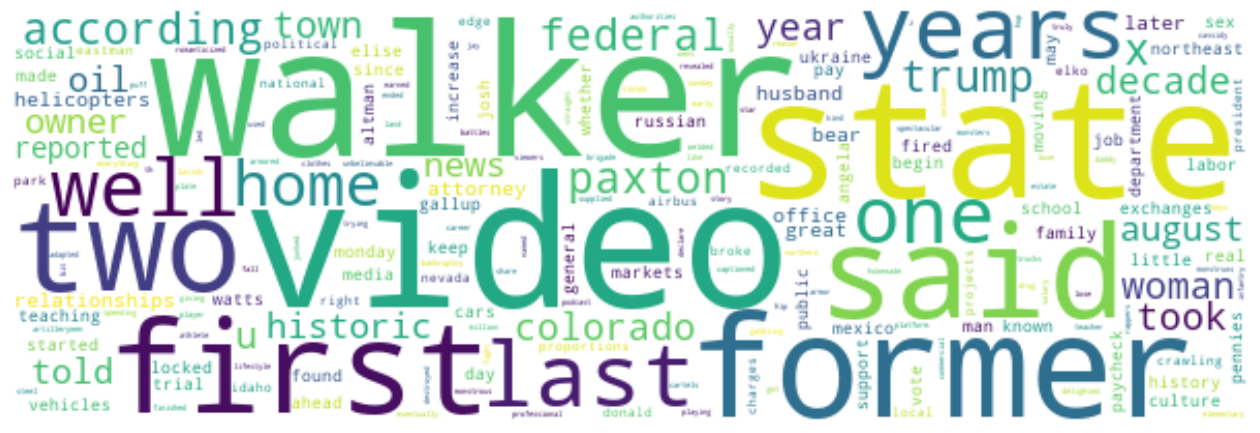

In [30]:
# Counts the frequency of each word in 'processed_text'
word_frequency = collections.Counter(processed_text)
print(word_frequency)

# Generates a Word Cloud image from the word frequencies
wc = WordCloud(width=600, height=200, max_words=200, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non-Answers

See: https://github.com/cafawo/FinancialDataAnalytics/blob/master/nonanswers.pdf

### Sentiment analysis

Sentiment analysis, also referred to as opinion mining, is a subfield of Natural Language Processing (NLP) that aims to identify and extract subjective information from text sources. The primary objective is to determine the sentiment expressed in a piece of text, which could be positive, negative, or neutral. 

We typically find lexicon or glossary based approaches to sentiment analysis. A lexicon-based approach to sentiment analysis is different from machine learning-based approaches. Machine learning models learn from labelled data, extracting patterns from this data to predict sentiment in unseen data. A sentiment lexicon, such as VADER, however, already has sentiment scores for each word, and applies rules to these scores to compute the sentiment of a whole sentence or a text.

[VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://ojs.aaai.org/index.php/icwsm/article/view/14550) is a lexicon and rule-based sentiment analysis tool that is particularly attuned to sentiments expressed in social media contexts. It's used in the field of Natural Language Processing (NLP) to quantify the sentiment of a piece of text, such as a tweet or a review. A similar example is the non-answers glossary that was introduced in the aforementioned paper, available at: https://econlinguistics.org/glossary.txt


See:
* https://www.nltk.org/api/nltk.sentiment.vader.html
* https://www.kaggle.com/datasets/nltkdata/vader-lexicon

In [31]:
# Importing necessary libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

def analyze_sentiment(article_text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(article_text)
    return sentiment


# Positive text
positive_text = "The product is wonderful and the service has been outstanding."
print(f"Positive text polarity: {analyze_sentiment(positive_text)}")

# Negative text
negative_text = "The firm reported a disappointing quarter, with revenues falling short of expectations."
print(f"Negative text polarity: {analyze_sentiment(negative_text)}")

# Neutral text
neutral_text = "The Federal Reserve announced a new interest rate of 0.75%."
print(f"Neutral text polarity: {analyze_sentiment(neutral_text)}")

Positive text polarity: {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.8271}
Negative text polarity: {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.5859}
Neutral text polarity: {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Latent Dirichlet Allocation (LDA)

[LDA, or Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation), is a generative statistical model for topic modeling in text documents that allows sets of observations to be explained by unobserved groups. In the context of natural language processing, these unobserved groups can explain why some parts of the data are similar.

For instance, if observations are words collected into documents, LDA posits that each document is a mixture of a small number of topics and that each word's creation is attributable to one of the document's topics.

In a nut shell:

1. Set the number of topics (e.g. `n_components=3`).
2. Assign each word in each document to a random topic.
3. Update topic assignments iteratively by calculating:
    - The proportion of tokens in a document assigned to a topic, and
    - The proportion of assignments to a topic that come from a certain token.
4. Stabilize the algorithm until the topic assignments stop changing.
5. Interpret the topics by examining the most common tokens in each topic.
6. Assign topics to new documents with the trained model.

See:
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
 
# Find all the news article summaries in the scraped data
articles = soup.find_all('p', class_='Fz(14px) Lh(19px) Fz(13px)--sm1024 Lh(17px)--sm1024 LineClamp(2,38px) LineClamp(2,34px)--sm1024 M(0)')
# Loop over each article in 'articles', extracts the text and appends it to 'raw_text
documents = []
for article in articles:
    documents.append(article.text)

# Preprocessing
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
data_vectorized = vectorizer.fit_transform(documents)

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=3,                # Number of topics
                                      max_iter=10,                   # Max learning iterations
                                      learning_method='online',      # Faster
                                      random_state=100,              # Random state
                                      batch_size=5,                  # n docs in each learning iter
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
display(df_topic_keywords)

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,helicopters,x9,airbus,idaho,elko,projects,nevada,crawling,decade,paxton
Topic 1,walker,trump,state,federal,great,bear,home,news,owner,according
Topic 2,woman,right,edge,national,park,video,town,exchanges,elise,school


#  Server infrastructure

Many projects, especially those involving scraping, require us to regularly acquire and store data. It is therefore inefficient to manually start the process or to run it on a machine that is not permanently connected to the internet. Luckily there are several server based options available that allow is to continuously run our software. 

One of the world's largest server providers is [Amazon Web Services (AWS)](https://aws.amazon.com/). A cheaper option, with a free plan for academic purposes is [PythonAnywhere](https://www.pythonanywhere.com/), which we will use as an example in this section.

### Recurring tasks

Let's have a look at two programming paradigms that allow us to run tasks recurring tasks continuously:

1. Infinite loops
2. Tasks scheduled by the operating system

Let us start by defining a task that does is robust to exceptions. When not continuously monitoring a task, it is good practice to create a .log file that captures information on the execution, which is extremely helpful for debugging. Have a look at Python's [Logging package](https://docs.python.org/3/library/logging.html).

In [33]:
def task():
    try:
        # The actual task goes here
        print("Trying to solve the task ...")
        raise Exception('The code will survive this exception.')
    except Exception as e:
        # One could fix or log exceptions here
        print("There was an exception, however,")
        print(e)
    finally:
        # This part is executed on every pass (exception or not)
        # Consider closing database connections here
        print("Finally ...")

task()

Trying to solve the task ...
There was an exception, however,
The code will survive this exception.
Finally ...


#### Infinite loop

Obviously, the task above runs only once. If we want to run in permanently, we have to nest it in a loop or schedule it. Here is an example for a corresponding loop:

In [34]:
while True:
    # Execute the task ...
    task()
    # Try to be gentle to your system resources ...
    time.sleep(1)
    # Let's kill the loop ...
    raise Exception('This exception will kill the loop.')


Trying to solve the task ...
There was an exception, however,
The code will survive this exception.
Finally ...


Exception: This exception will kill the loop.

Another, and perhaps more elegant, solution is to schedule the task. This works like a charm on Unix based system and PythonAnywhere but is a major pain on Windows - so I do not even try the latter anymore.

#### Cron

On a Unix system, simply run the bash command
```Bash
crontab -e
```
[Cron](https://en.wikipedia.org/wiki/Cron) allows you any task that could also run in the command line, including any .py script.

```Bash
# ┌───────────── minute (0 - 59)
# │ ┌───────────── hour (0 - 23)
# │ │ ┌───────────── day of the month (1 - 31)
# │ │ │ ┌───────────── month (1 - 12)
# │ │ │ │ ┌───────────── day of the week (0 - 6) (Sunday to Saturday;
# │ │ │ │ │                                       7 is also Sunday on some systems)
# │ │ │ │ │
# │ │ │ │ │
# * * * * * <command to execute>
```

#### PythonAnywhere

It get's even easier with a service like [PythonAnywhere](https://www.pythonanywhere.com/) that wraps task scheduling into a web interface, see: 

* https://help.pythonanywhere.com/pages/
* https://www.pythonanywhere.com/user/[yourusername]/tasks_tab/

By the way, you can also run web applications, such as live reporting of a trading algorithm :) in PythonAnywhere, see: 

* https://help.pythonanywhere.com/pages/FollowingTheDjangoTutorial/
* https://github.com/cafawo/basicdjango
* https://thecvx.com/

Reporting your results with sth. like that would impress me plenty, however, is not a must have.

## Logging


In Python, [logging](https://docs.python.org/3/library/logging.html) is a standard library module used to track events or issues that occur when software runs. The logging module offers a full-featured and flexible logging system. At its simplest, log messages are sent to a log file or the console. However, you can also configure loggers to send messages to various other locations, including network sockets.

Logging provides several benefits over using print statements:

1. It provides a way to categorize and prioritize your log messages. This is done using log levels like DEBUG, INFO, WARNING, ERROR, CRITICAL.

2. It can write log messages to any location. With print statements, the output goes to the standard output (i.e., the console), but logging can write to files, sockets, HTTP GET/POST locations, email, or any other kind of data stream.

3. It is easy to differentiate regular output from debugging information. This is because logging provides a way to "turn off" or "turn on" messages of various importance.

4. It can provide more detailed context for each message, like where and when a problem occurred, what function or module it occurred in, etc.

First, lets set up the logger ...


In [ ]:
# Logging specific
import logging
import time
logging.basicConfig(format='# %(asctime)s %(message)s',
                    filename='slides_pt5.log',
                    level=logging.WARNING)
logging.getLogger().addHandler(logging.StreamHandler())
logging.Formatter.converter = time.gmtime

With the logger in place, we can start to log stuff ...

In [ ]:
# Log some messages
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('Careful! Something does not look right')
logging.error('An error occurred')
logging.critical('Critical failure')

Careful! Something does not look right
An error occurred
Critical failure


Logging can also capture exceptions that occur within a `try` statement.

In [ ]:
try:
    raise Exception("Sth. went wrong!")
except Exception as e:
    logging.exception(e)

Sth. went wrong!
Traceback (most recent call last):
  File "C:\Users\nb\AppData\Local\Temp\ipykernel_12928\2382030352.py", line 2, in <module>
    raise Exception("Sth. went wrong!")
Exception: Sth. went wrong!
